Execution Plan
    -Understanding Data
    -Data Cleaning
    -Exploratory Data Analysis
    -Model building
    -Model Evaluation
    -Inferences

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [3]:
H = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
H_T = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
H.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
H.shape

(1460, 81)

In [5]:
H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
H[H.duplicated()]
#No duplicates

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [7]:
H[H.loc[:,~H.columns.isin(['SalePrice'])].duplicated()]
#No duplicates

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [8]:
Unique_data = H.apply(pd.Series.nunique)
Unique_data[Unique_data == 1]
#No single unique values in the dataset

Series([], dtype: int64)

### Null value treatment

In [9]:
Sum = H.isnull().sum().sort_values(ascending = False)
Percent = ((H.isnull().sum()*100)/H.count()[0]).sort_values(ascending = False)
NullValues = pd.concat([Sum, Percent], axis = 1, keys = ["Sum", "Percent"])
NullValues[NullValues.Sum > 0]

,Sum,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [10]:
#Deleting columns that have more than 20% missing values and Id column
H.drop(['Id','Alley', 'PoolQC', 'Fence','MiscFeature','MiscVal','FireplaceQu','LotFrontage'], axis = 1, inplace = True)

In [11]:
Sum = H.isnull().sum().sort_values(ascending = False)
Percent = ((H.isnull().sum()*100)/H.count()[0]).sort_values(ascending = False)
NullValues = pd.concat([Sum, Percent], axis = 1, keys = ["Sum", "Percent"])
NullValues[NullValues.Sum > 0]

,Sum,Percent
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageQual,81,5.547945
GarageFinish,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtFinType1,37,2.534247
BsmtCond,37,2.534247
BsmtQual,37,2.534247


#### Dealing with missing values in Garage

In [12]:
H[H["GarageArea"] == 0][['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual','GarageCond']]

# Missing values exist as there is no garage for these homes

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


In [13]:
H.fillna({'GarageType': 'NoGarage', 'GarageYrBlt': 0, 'GarageFinish': 'NoGarage', 'GarageQual': 'NoGarage','GarageCond': 'NoGarage'} , inplace = True)

#Filling appropriate values for nulls 

In [14]:
H[H["GarageArea"] == 0][['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual','GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NoGarage,0.0,NoGarage,NoGarage,NoGarage
48,NoGarage,0.0,NoGarage,NoGarage,NoGarage
78,NoGarage,0.0,NoGarage,NoGarage,NoGarage
88,NoGarage,0.0,NoGarage,NoGarage,NoGarage
89,NoGarage,0.0,NoGarage,NoGarage,NoGarage
...,...,...,...,...,...
1349,NoGarage,0.0,NoGarage,NoGarage,NoGarage
1407,NoGarage,0.0,NoGarage,NoGarage,NoGarage
1449,NoGarage,0.0,NoGarage,NoGarage,NoGarage
1450,NoGarage,0.0,NoGarage,NoGarage,NoGarage


#### Dealing with missing values in Basement

In [15]:
H[H['TotalBsmtSF'] == 0][['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().sum()

# Missing values exist as there is no basement for these homes

BsmtQual        37
BsmtCond        37
BsmtExposure    37
BsmtFinType1    37
BsmtFinType2    37
dtype: int64

In [16]:
H[H['TotalBsmtSF'] > 0][['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().sum()

# BsmtExposure and BsmtFinType2 have missing values though these homes have a basement

BsmtQual        0
BsmtCond        0
BsmtExposure    1
BsmtFinType1    0
BsmtFinType2    1
dtype: int64

In [17]:
mode = H['BsmtExposure'].mode()[0]
H.loc[(H['TotalBsmtSF'] > 0) & (H['BsmtExposure'].isnull()), 'BsmtExposure'] = mode

mode = H['BsmtFinType2'].mode()[0]
H.loc[(H['TotalBsmtSF'] > 0) & (H['BsmtFinType2'].isnull()), 'BsmtFinType2'] = mode

#Filling these nulls with mode

In [18]:
H.fillna({'BsmtQual': 'NoBasement', 'BsmtCond': 'NoBasement','BsmtExposure': 'NoBasement', 'BsmtFinType1': 'NoBasement', 'BsmtFinType2': 'NoBasement'} , inplace = True)


#Filling appropriate values for other nulls 

In [19]:
mode = H['Electrical'].mode()[0]
H['Electrical'].fillna(mode, inplace = True)
mode = H['MasVnrType'].mode()[0]
H['MasVnrType'].fillna(mode, inplace = True)
median = H['MasVnrArea'].median()
H['MasVnrArea'].fillna(median, inplace = True)

# Filling missing values in MasVnrArea,MasVnrType,Electrical with mode

In [20]:
Sum = H.isnull().sum().sort_values(ascending = False)
Percent = ((H.isnull().sum()*100)/H.count()[0]).sort_values(ascending = False)
NullValues = pd.concat([Sum, Percent], axis = 1, keys = ["Sum", "Percent"])
NullValues[NullValues.Sum > 0]

#No null values

,Sum,Percent


### Deriving new features

In [21]:
H["AgeOfHouse"] = 2011 - H["YearBuilt"]
H["AgeOfRemod"] = 2011 - H["YearRemodAdd"]
H['AgeOfSell'] = 2011 - H['YrSold']
H['AgeOfGarage'] = 2011 - H['GarageYrBlt']
H.loc[H['AgeOfGarage'] > 100 , 'AgeOfGarage'] = 0
H.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis = 1, inplace = True)

#Using age instead of year for better intution and ease

In [22]:
H['BsmtBath'] = H['BsmtFullBath'] + (0.5 * H['BsmtHalfBath'])
H['Bath'] = H['FullBath'] + (0.5 * H['HalfBath'])

In [23]:
H['TotalPorchArea'] = H['OpenPorchSF'] + H['EnclosedPorch'] + H['3SsnPorch'] + H['ScreenPorch']

### Segregation of columns by their nature

In [24]:
numerical_columns = ['SalePrice','LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','TotalPorchArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MasVnrArea','AgeOfGarage', 'AgeOfHouse', 'AgeOfRemod','AgeOfSell']
categorical_columns = ['BsmtBath','Bath','BedroomAbvGr','BldgType','BsmtHalfBath','BsmtFullBath','Condition1','Condition2','Electrical','Exterior1st','Exterior2nd','Fireplaces','Foundation','FullBath','Functional','GarageCars','GarageFinish','GarageType','HalfBath','Heating','HouseStyle','KitchenAbvGr','LandContour','LandSlope','LotConfig','LotShape','MSSubClass','MSZoning','MasVnrType','MoSold','Neighborhood','PavedDrive','RoofMatl','RoofStyle','SaleCondition','SaleType','Street','TotRmsAbvGrd','Utilities']
ordinal_columns = [ "OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual",'BsmtCond',"BsmtExposure","HeatingQC","KitchenQual","GarageQual","GarageCond", 'BsmtFinType1', 'BsmtFinType2','CentralAir']

### Filling ordinal columns with appropriate values

In [25]:
H[ordinal_columns]

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,GarageQual,GarageCond,BsmtFinType1,BsmtFinType2,CentralAir
0,7,5,Gd,TA,Gd,TA,No,Ex,Gd,TA,TA,GLQ,Unf,Y
1,6,8,TA,TA,Gd,TA,Gd,Ex,TA,TA,TA,ALQ,Unf,Y
2,7,5,Gd,TA,Gd,TA,Mn,Ex,Gd,TA,TA,GLQ,Unf,Y
3,7,5,TA,TA,TA,Gd,No,Gd,Gd,TA,TA,ALQ,Unf,Y
4,8,5,Gd,TA,Gd,TA,Av,Ex,Gd,TA,TA,GLQ,Unf,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5,TA,TA,Gd,TA,No,Ex,TA,TA,TA,Unf,Unf,Y
1456,6,6,TA,TA,Gd,TA,No,TA,TA,TA,TA,ALQ,Rec,Y
1457,7,9,Ex,Gd,TA,Gd,No,Ex,Gd,TA,TA,GLQ,Unf,Y
1458,5,6,TA,TA,TA,TA,Mn,Gd,Gd,TA,TA,GLQ,Rec,Y


In [26]:
H['ExterQual'] = H['ExterQual'].map({'Po' : 1, 'Fa': 2, 'TA' : 3, 'Gd': 4 , 'Ex' : 5})
H['ExterCond'] = H['ExterCond'].map({'Po' : 1, 'Fa': 2, 'TA' : 3, 'Gd': 4 , 'Ex' : 5})
H['BsmtQual'] = H['BsmtQual'].map({'NoBasement' : 0, 'NA' : 0, 'Po' : 1, 'Fa': 2, 'TA' : 3, 'Gd': 4 , 'Ex' : 5})
H['BsmtCond'] = H['BsmtCond'].map({'NoBasement' : 0, 'NA' : 0, 'Po' : 1, 'Fa': 2, 'TA' : 3, 'Gd': 4 , 'Ex' : 5})
H['BsmtExposure'] = H['BsmtExposure'].map({'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1, 'NoBasement' : 0})
H['HeatingQC'] = H['HeatingQC'].map({'Po' : 1, 'Fa': 2, 'TA' : 3, 'Gd': 4 , 'Ex' : 5})
H['KitchenQual'] = H['KitchenQual'].map({'Po' : 1, 'Fa': 2, 'TA' : 3, 'Gd': 4 , 'Ex' : 5})
H['GarageQual'] = H['GarageQual'].map({'NoGarage' : 0, 'NA' : 0, 'Po' : 1, 'Fa': 2, 'TA' : 3, 'Gd': 4 , 'Ex' : 5})
H['GarageCond'] = H['GarageCond'].map({'NoGarage' : 0, 'NA' : 0, 'Po' : 1, 'Fa': 2, 'TA' : 3, 'Gd': 4 , 'Ex' : 5})
H['BsmtFinType1'] = H['BsmtFinType1'].map({'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'NoBasement' : 0})
H['BsmtFinType2'] = H['BsmtFinType2'].map({'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'NoBasement' : 0})
H['CentralAir'] = H['CentralAir'].map({'N' : 0, 'Y' : 1})

In [27]:
H[ordinal_columns].head(5)

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,GarageQual,GarageCond,BsmtFinType1,BsmtFinType2,CentralAir
0,7,5,4,3,4,3,1,5,4,3,3,6,1,1
1,6,8,3,3,4,3,4,5,3,3,3,5,1,1
2,7,5,4,3,4,3,2,5,4,3,3,6,1,1
3,7,5,3,3,3,4,1,4,4,3,3,5,1,1
4,8,5,4,3,4,3,3,5,4,3,3,6,1,1


In [28]:
H[ordinal_columns].isnull().sum()

OverallQual     0
OverallCond     0
ExterQual       0
ExterCond       0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
HeatingQC       0
KitchenQual     0
GarageQual      0
GarageCond      0
BsmtFinType1    0
BsmtFinType2    0
CentralAir      0
dtype: int64

### Dealing with datatypes of categorical columns

In [29]:
H[categorical_columns].dtypes

BsmtBath         float64
Bath             float64
BedroomAbvGr       int64
BldgType          object
BsmtHalfBath       int64
BsmtFullBath       int64
Condition1        object
Condition2        object
Electrical        object
Exterior1st       object
Exterior2nd       object
Fireplaces         int64
Foundation        object
FullBath           int64
Functional        object
GarageCars         int64
GarageFinish      object
GarageType        object
HalfBath           int64
Heating           object
HouseStyle        object
KitchenAbvGr       int64
LandContour       object
LandSlope         object
LotConfig         object
LotShape          object
MSSubClass         int64
MSZoning          object
MasVnrType        object
MoSold             int64
Neighborhood      object
PavedDrive        object
RoofMatl          object
RoofStyle         object
SaleCondition     object
SaleType          object
Street            object
TotRmsAbvGrd       int64
Utilities         object
dtype: object

In [30]:
for i in range(0, len(categorical_columns)):
    if (H[categorical_columns[i]].dtype == 'int64') | (H[categorical_columns[i]].dtype == 'float64'):
        H[categorical_columns[i]] = H[categorical_columns[i]].apply(str)
        
#Changing data type to string/object

In [31]:
H[categorical_columns].head()

,BsmtBath,Bath,BedroomAbvGr,BldgType,BsmtHalfBath,BsmtFullBath,Condition1,Condition2,Electrical,Exterior1st,...,MoSold,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,TotRmsAbvGrd,Utilities
0,1.0,2.5,3,1Fam,0,1,Norm,Norm,SBrkr,VinylSd,...,2,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,8,AllPub
1,0.5,2.0,3,1Fam,1,0,Feedr,Norm,SBrkr,MetalSd,...,5,Veenker,Y,CompShg,Gable,Normal,WD,Pave,6,AllPub
2,1.0,2.5,3,1Fam,0,1,Norm,Norm,SBrkr,VinylSd,...,9,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,6,AllPub
3,1.0,1.0,3,1Fam,0,1,Norm,Norm,SBrkr,Wd Sdng,...,2,Crawfor,Y,CompShg,Gable,Abnorml,WD,Pave,7,AllPub
4,1.0,2.5,4,1Fam,0,1,Norm,Norm,SBrkr,VinylSd,...,12,NoRidge,Y,CompShg,Gable,Normal,WD,Pave,9,AllPub


### Dealing with outliers in Categorical variables 

In [32]:
H["BsmtBath"].value_counts()

0.0    783
1.0    581
0.5     71
2.0     15
1.5      9
3.0      1
Name: BsmtBath, dtype: int64

In [33]:
H.loc[H["BsmtBath"] == '3.0', 'BsmtBath'] = '2.0'

#Merging 3 baths to 2 as there is only 1 record

In [34]:
H["BedroomAbvGr"].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [35]:
H.loc[H["BedroomAbvGr"] == '8', 'BedroomAbvGr'] = '6'
#Merging 8 to closer one 6

In [36]:
H["BsmtFullBath"].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [37]:
H.loc[H["BsmtFullBath"] == '3', 'BsmtFullBath'] = '2'
#Merging 3 to closer one 2

In [38]:
H["Condition1"].value_counts()
# Not merging as they seem to have an importance

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [39]:
H["Condition2"].value_counts()

Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

In [40]:
H.loc[H["Condition2"].isin(['PosA','RRAn','RRAe']), 'Condition2'] = 'PosA_RRAn_RRAe'
#Merging 'PosA','RRAn','RRAe' to one field

In [41]:
H["Electrical"].value_counts()
# Not merging as they seem to have some importance

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [42]:
H["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [43]:
H.loc[H["Exterior1st"].isin(['Stone','BrkComm','CBlock','AsphShn','ImStucc']), 'Exterior1st'] = 'Other'
#Renaming 'Stone','BrkComm','CBlock','AsphShn','ImStucc' to other

In [44]:
H["Exterior2nd"].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [45]:
H.loc[H["Exterior2nd"].isin(['Stone','Brk Cmn','CBlock','AsphShn','ImStucc','Other']), 'Exterior2nd'] = 'Other'
# Renaming 'Stone','BrkComm','CBlock','AsphShn','ImStucc' to Other

In [46]:
H["Utilities"].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [47]:
H.drop(['Utilities'], axis = 1, inplace = True)
categorical_columns.remove('Utilities')

#Droping Utilities as it has 99% data as 1 unique value

In [48]:
H["Heating"].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [49]:
H.loc[H["Heating"] == 'Floor', 'Heating'] = 'OthW'
#Merging 'Floor' to 'OthW'

In [50]:
H["RoofMatl"].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
ClyTile       1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

In [51]:
H.loc[H["RoofMatl"].isin(['Roll','Membran','Metal','ClyTile']), 'RoofMatl'] = 'Other'
#Clubbing 'Roll','Membran','Metal','ClyTile' to other

In [52]:
H["TotRmsAbvGrd"].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

In [53]:
H.loc[H["TotRmsAbvGrd"] == '2', 'TotRmsAbvGrd'] = '3'
H.loc[H["TotRmsAbvGrd"] == '14', 'TotRmsAbvGrd'] = '12'
#Merging outliers to closer values

### Checking numerical values of skewedness

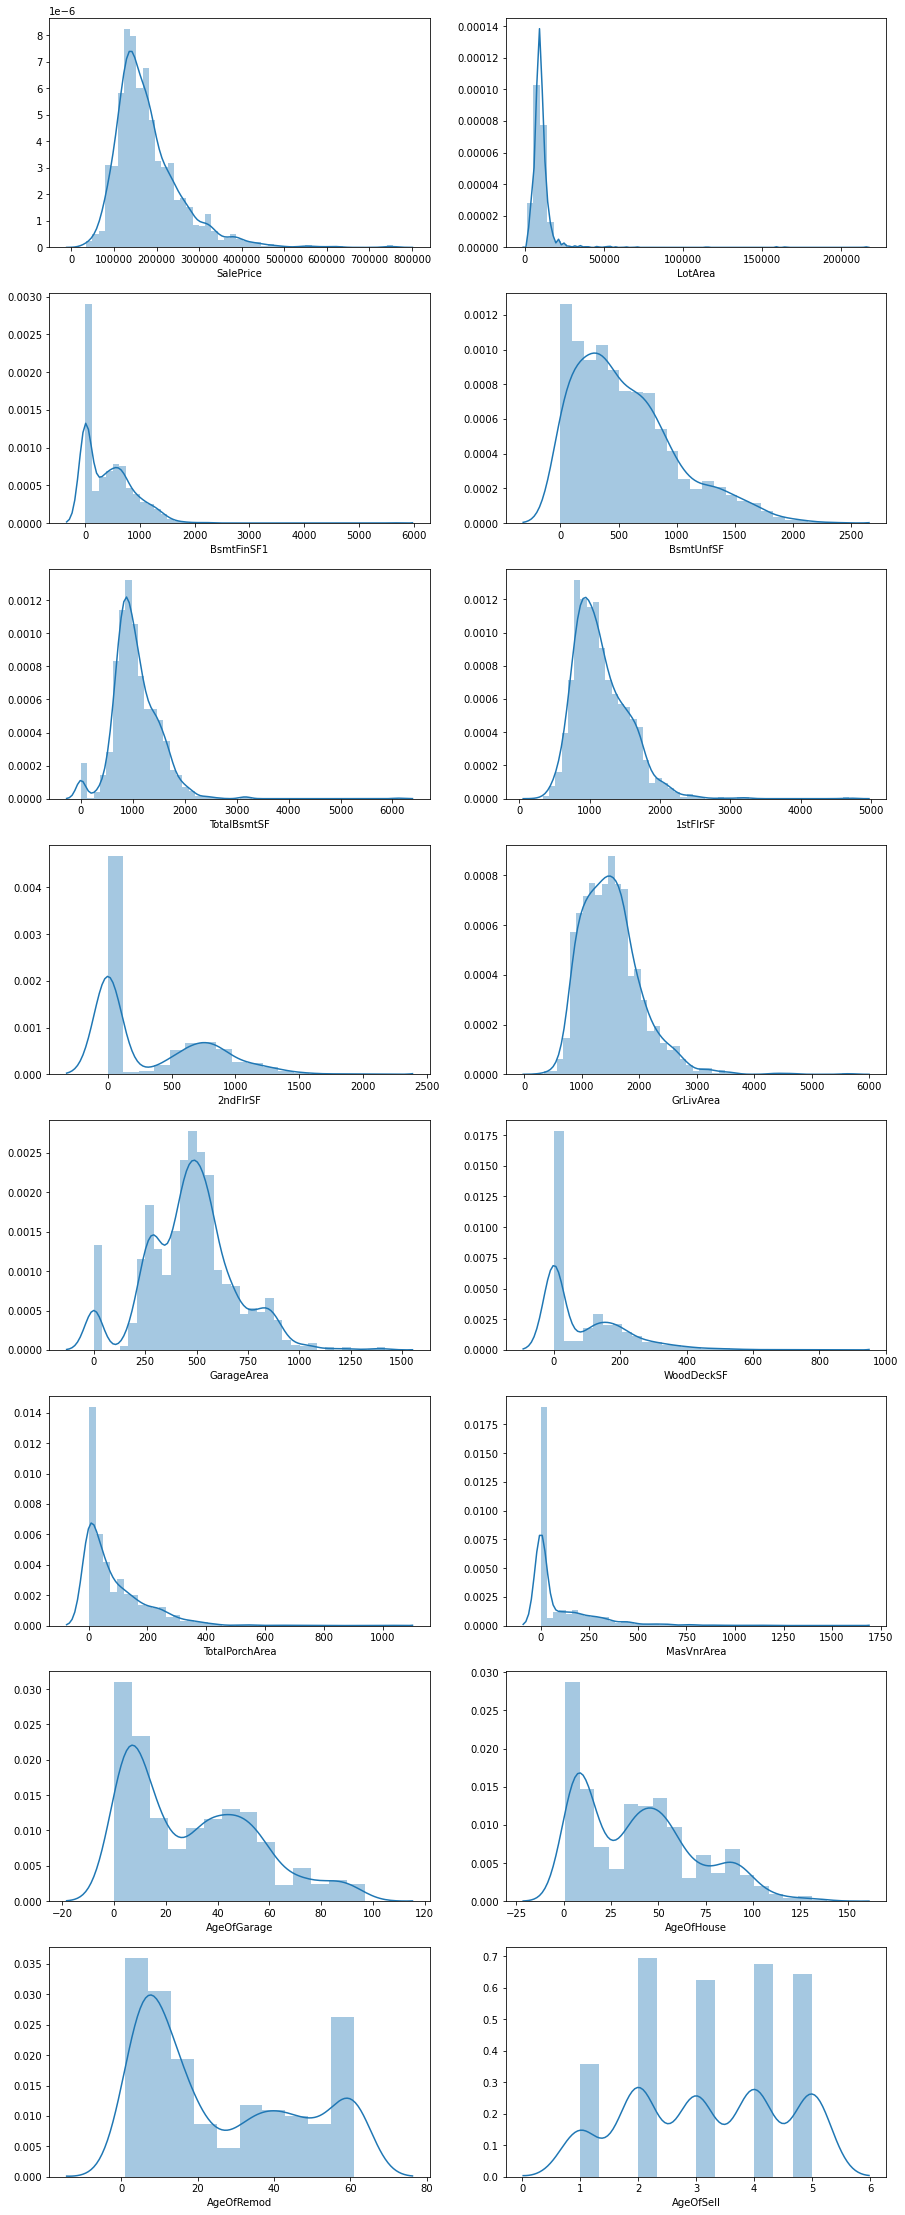

In [54]:
numerical_columns_1 = ['SalePrice','LotArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','TotalPorchArea','MasVnrArea','AgeOfGarage', 'AgeOfHouse', 'AgeOfRemod','AgeOfSell']
plt.figure(figsize=(15,60))
for i in range(0, len(numerical_columns_1)):
    plt.subplot(12,2,(i+1))
    sns.distplot(H[numerical_columns_1[i]])

#### Attempt to correct skewedness with box cox

In [55]:
from scipy import stats

# correcting target variable
H['SalePrice'], fitted_lambda = stats.boxcox(H['SalePrice'])

#Correcting some normally distributed but skewed numerical data
H['LotArea'], fitted_lambda = stats.boxcox(H['LotArea'])
H['1stFlrSF'], fitted_lambda = stats.boxcox(H['1stFlrSF'])
H['GrLivArea'], fitted_lambda = stats.boxcox(H['GrLivArea'])



In [56]:
H['TotalBsmtSF'].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

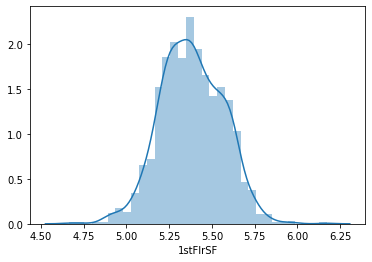

In [57]:
sns.distplot(H['1stFlrSF'])

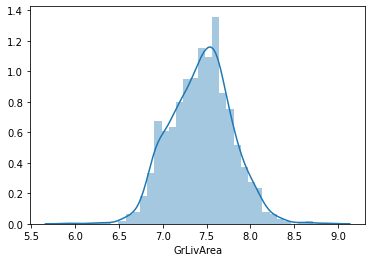

In [58]:
sns.distplot(H['GrLivArea'])

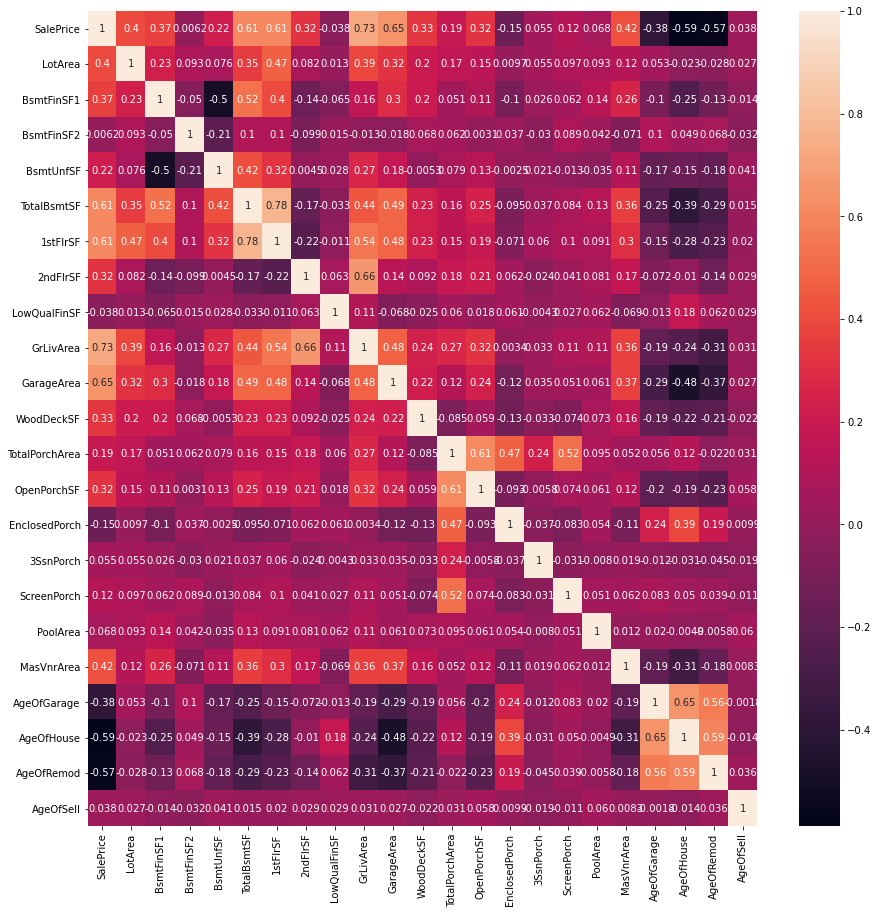

In [59]:
plt.figure(figsize=(15,15))
correlation = H[numerical_columns].corr()
sns.heatmap(correlation, annot = True)

#### Sale Price negatively correlated with age of house and age of remodeling
#### Total Basement area, 1st floor surface area, Garage living area, Garage area have high positive correlation with sale price 

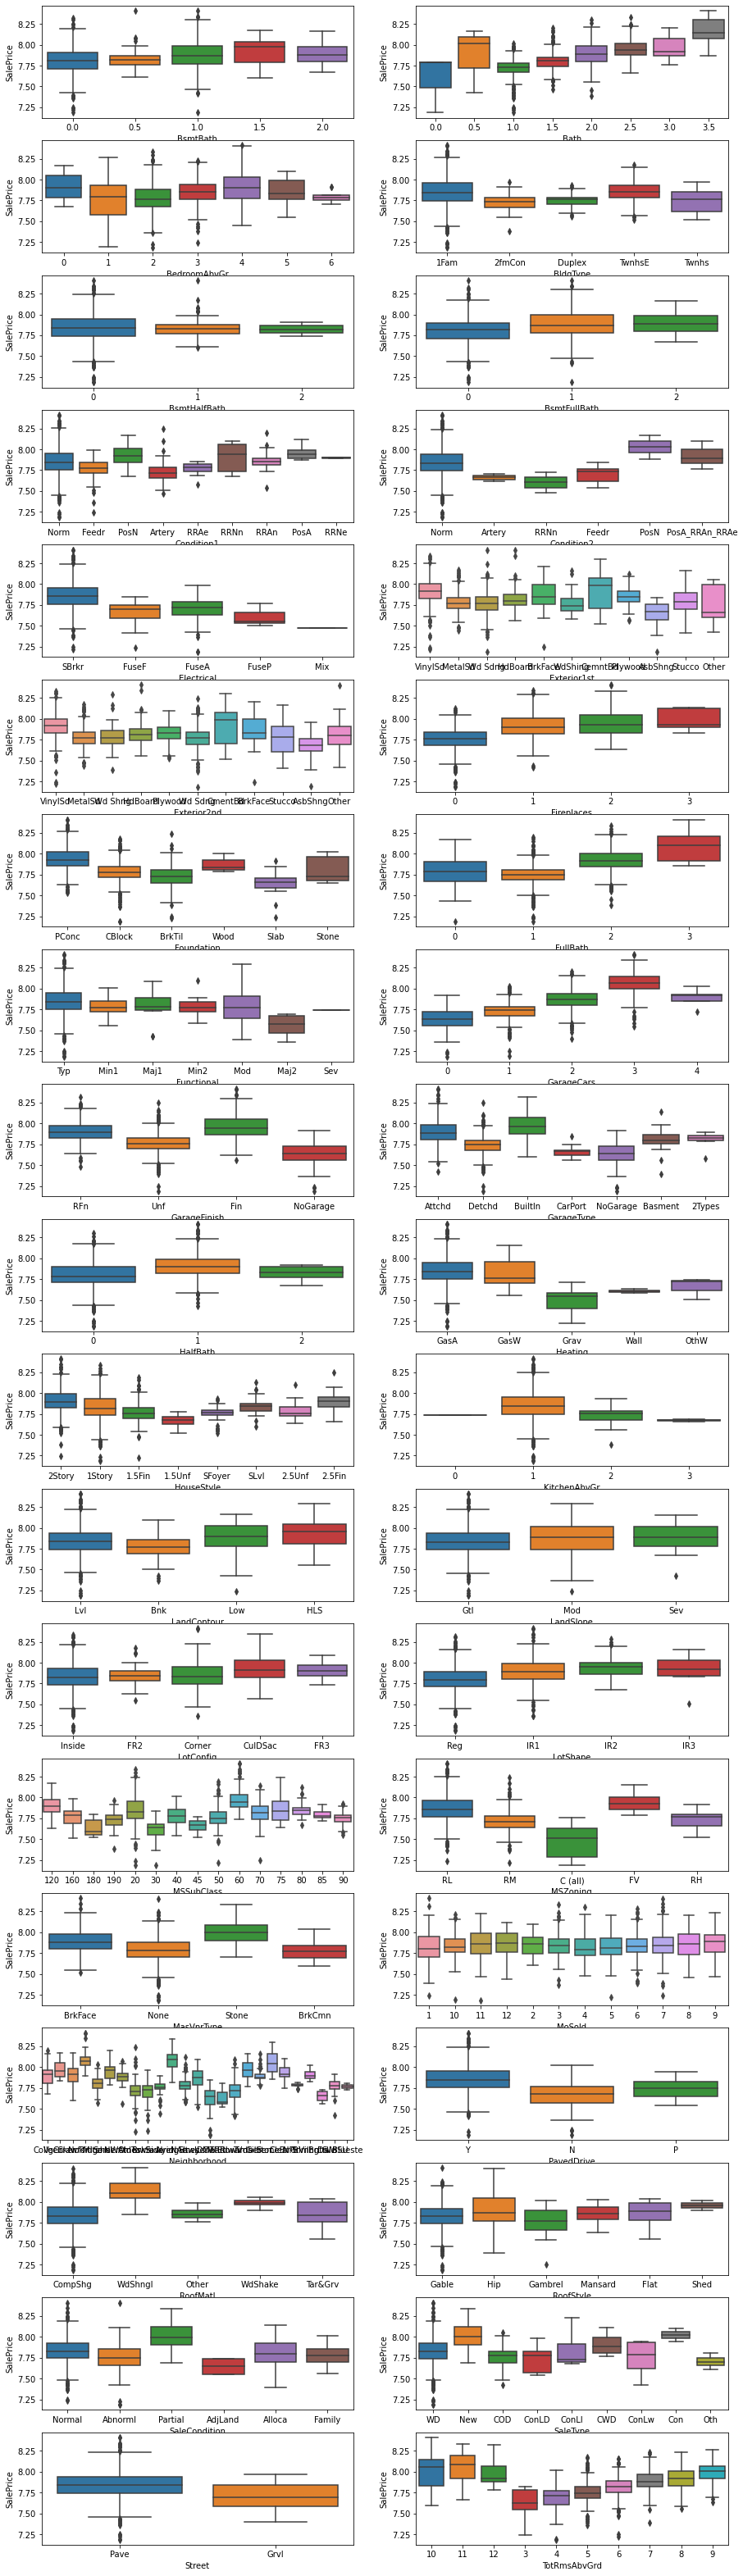

In [60]:
plt.figure(figsize=(15,60))
for i in range(0, len(categorical_columns)):
    plt.subplot(20,2,(i+1))
    sns.boxplot(data = H, x = categorical_columns[i], y = 'SalePrice'  )

#Plotting all categorical with box plot to ponder and check for any obvious issues with data    

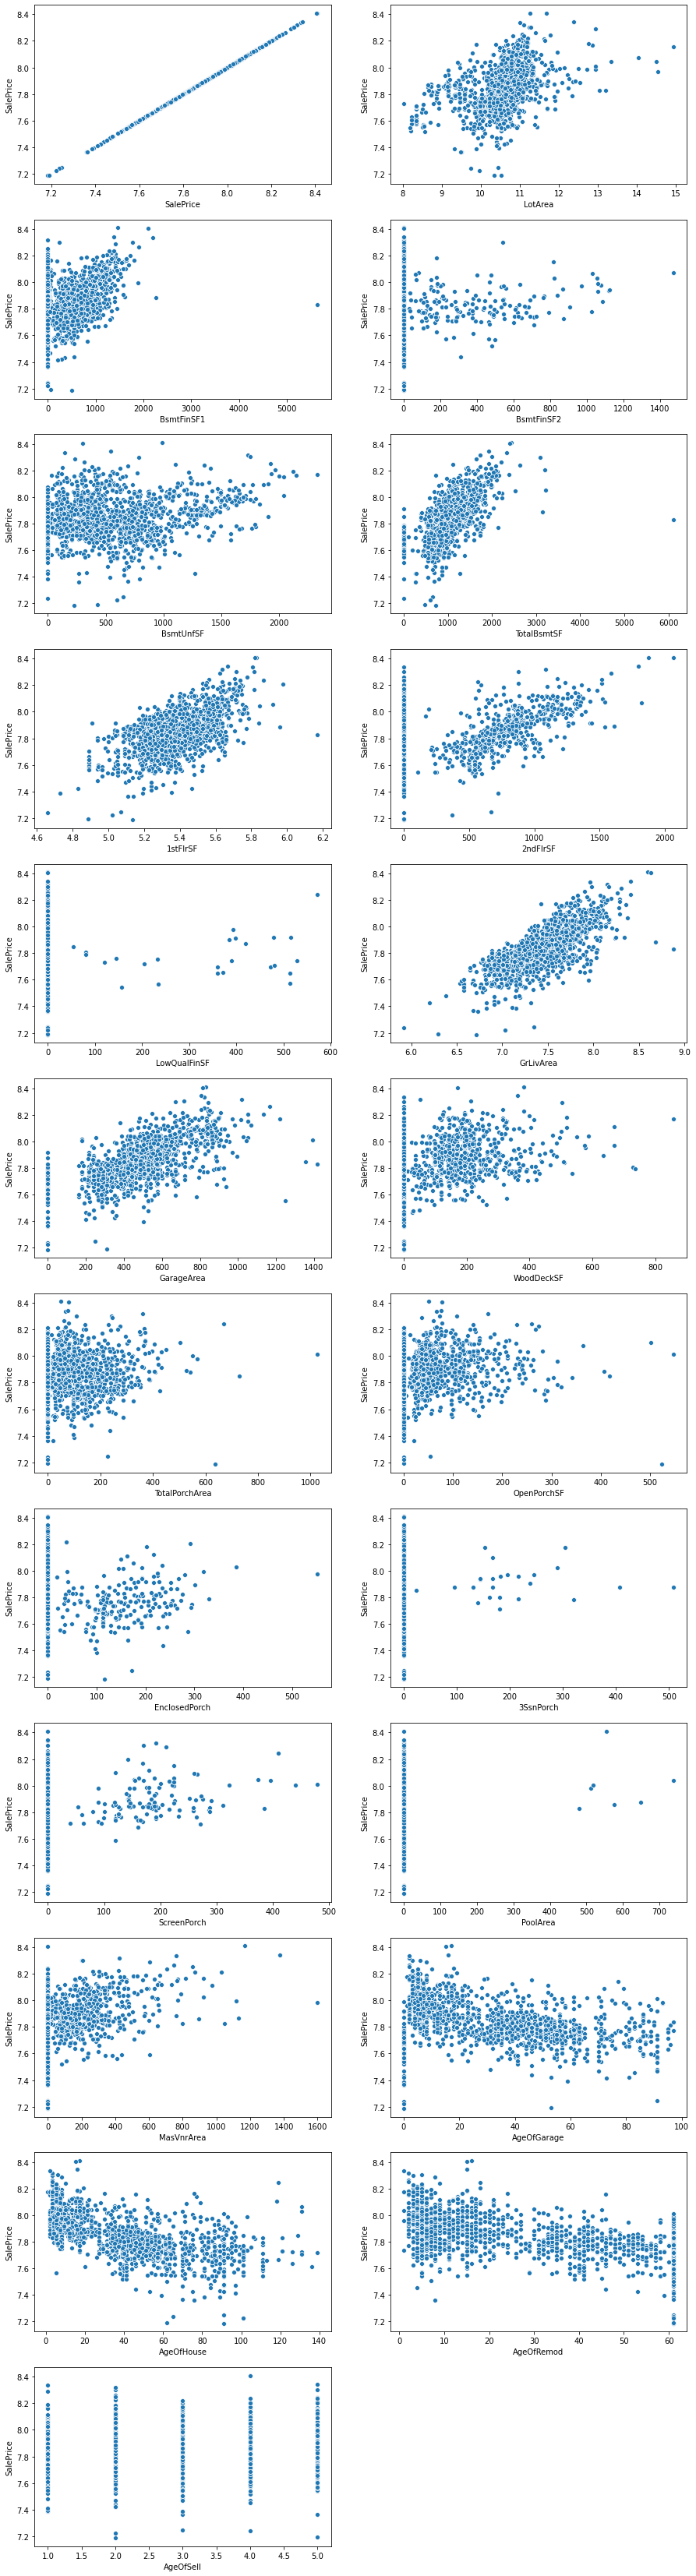

In [61]:
plt.figure(figsize=(15,60))
for i in range(0, len(numerical_columns)):
    plt.subplot(12,2,(i+1))
    sns.scatterplot(data = H, x = numerical_columns[i], y = 'SalePrice'  )
    
#Ploting all numerical data in scatter plots to ponder

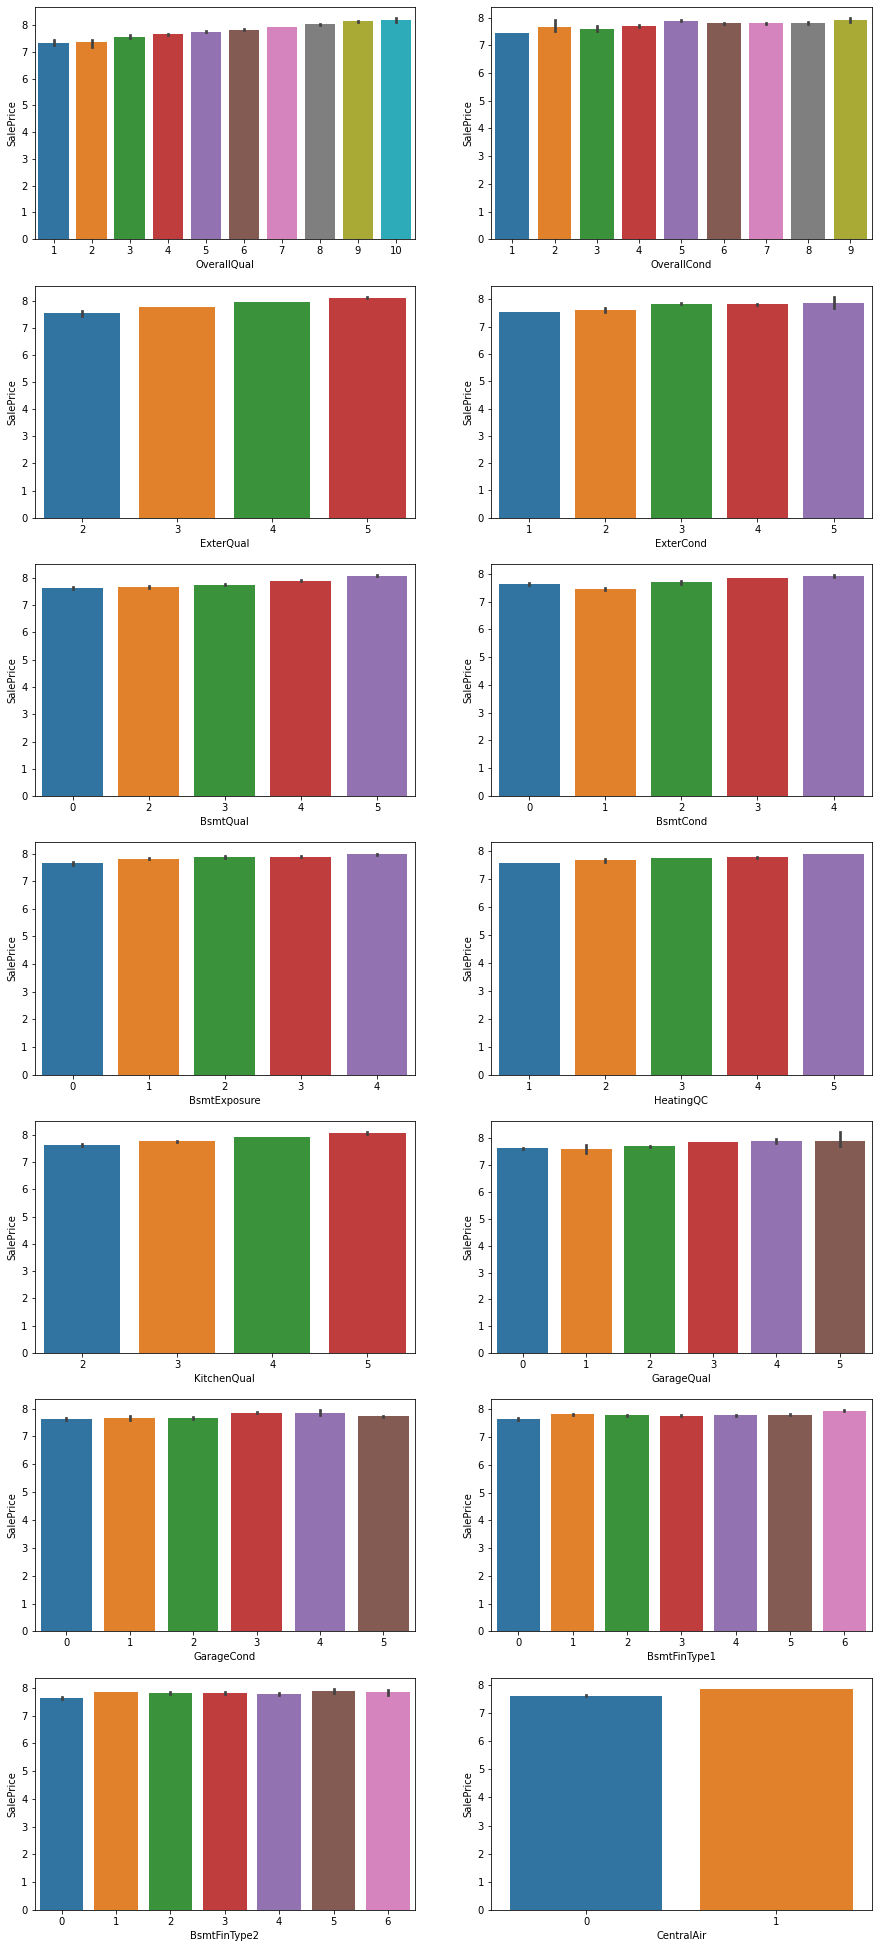

In [62]:
plt.figure(figsize=(15,35))
for i in range(0, len(ordinal_columns)):
    plt.subplot(7,2,(i+1))
    sns.barplot(data = H, x = ordinal_columns[i], y = 'SalePrice'  )
    
#Ploting all ordinal values with Sala price in a bar graph 
# Sale price doesnt seem to change much with any ordinal data

# Modeling

### Data Preparation for modelling 

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE


In [64]:
y = H['SalePrice']

X = H.drop(['SalePrice'], axis = 1)

In [65]:
X.shape

(1460, 74)

### Dummy creation

In [66]:
House_Dummies = pd.get_dummies(H[categorical_columns], drop_first = True)
House_Dummies.head()

,BsmtBath_0.5,BsmtBath_1.0,BsmtBath_1.5,BsmtBath_2.0,Bath_0.5,Bath_1.0,Bath_1.5,Bath_2.0,Bath_2.5,Bath_3.0,...,Street_Pave,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9
0,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [67]:
len(categorical_columns)

38

In [68]:
X = X.drop(categorical_columns, axis = 1)
X = pd.concat([X, House_Dummies], axis=1)

In [69]:
X.shape

(1460, 246)

### Splitting data into train and test dataset

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Standardining all numerical values

In [71]:
scaler = StandardScaler()
numerical_columns.remove('SalePrice')
X_train[numerical_columns+ordinal_columns] = scaler.fit_transform(X_train[numerical_columns+ordinal_columns])
X_test[numerical_columns+ordinal_columns] = scaler.transform(X_test[numerical_columns+ordinal_columns])

In [72]:
X_train.shape

(1021, 246)

In [73]:
X_test.shape

(438, 246)

## Lasso regression

In [74]:
params = {'alpha': [0.00001,0.00005,0.0001, 0.0005,0.001,0.01, 0.02]}
#arams = {'alpha': [0.1, 1,10,100,200,300,500,1000]}


lasso = Lasso()


folds = 5
#Taking 5 folds for Cross validation

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.01,
                                   0.02]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

#### Plotting Negative Mean Absolute Error for Lasso to select appropriate alpha value

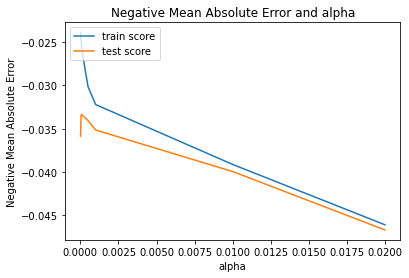

In [75]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### alpha as 0.001. That is where the test and train score are closer and higher before both going down together

In [76]:
alpha =0.001
lasso = Lasso(alpha=alpha)  
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [77]:
Lasso_coef = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lasso.coef_})
Lasso_coef[Lasso_coef['Coefficients'] != 0 ].sort_values(by = "Coefficients" , ascending = False).count()

#Feature selection is done by Lasso and features narrowed down to 46

Feature         46
Coefficients    46
dtype: int64

In [78]:
y_test_lasso_predict = lasso.predict(X_test)
y_train_lasso_predict = lasso.predict(X_train)

In [79]:
print(metrics.r2_score(y_true=y_test, y_pred=y_test_lasso_predict))
print(metrics.r2_score(y_true=y_train, y_pred=y_train_lasso_predict))

0.8837266535642342
0.9023179782091063


### Inference with Lasso regression

#### Test R2_score : 0.88

#### Train R2 Score : 0.90

#### Optimal alpha : 0.001

#### Features : 46

# Ridge Regression

In [80]:

params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 2, 10, 100, 1000]}


ridge = Ridge()

# cross validation with 5 folds
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5, 1, 1.5, 2, 10, 100, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

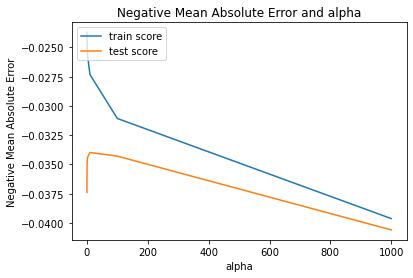

In [81]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### alpha as 100. That is where the test and train score are closer before train going down with test error

In [82]:
alpha =100
ridge = Ridge(alpha=alpha)  
ridge.fit(X_train, y_train) 

Ridge(alpha=100)

In [83]:
y_test_ridge_predict = ridge.predict(X_test)
y_train_ridge_predict = ridge.predict(X_train)

In [84]:
print(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_predict))
print(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_predict))

0.8879249311039878
0.9119042330295926


In [85]:
Ridge_coef = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":ridge.coef_})
Ridge_coef[Ridge_coef['Coefficients'] != 0 ].sort_values(by = "Coefficients" , ascending = False).count()
#No feature selection happened

Feature         245
Coefficients    245
dtype: int64

### Inference with Ridge regression

#### Test R2_score : 0.89

#### Train R2 Score : 0.91

#### Optimal alpha : 10

#### Features : 245

# ElasticNet Regression

In [86]:
params = {'alpha': [0,0.0001, 0.0005, 0.001, 0.01]}

elasticnet = ElasticNet()

# cross validation
model_cv = GridSearchCV(estimator = elasticnet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0, 0.0001, 0.0005, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

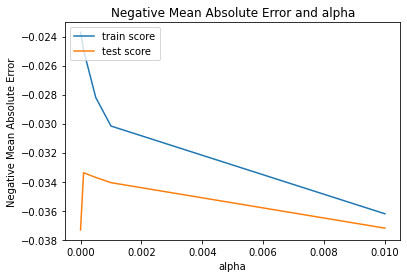

In [87]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### alpha as 0.0005. That is where the test and train score are closer before both going down together at constant rate

In [88]:
alpha =0.001
elasticnet = ElasticNet(alpha=alpha)  
elasticnet.fit(X_train, y_train) 

ElasticNet(alpha=0.001)

In [89]:
y_test_elasticnet_predict = elasticnet.predict(X_test)
y_train_elasticnet_predict = elasticnet.predict(X_train)

In [90]:
print(metrics.r2_score(y_true=y_test, y_pred=y_test_elasticnet_predict))
print(metrics.r2_score(y_true=y_train, y_pred=y_train_elasticnet_predict))

0.8898874491696167
0.915240354842279


In [91]:
elasticnet_coef = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":elasticnet.coef_})
elasticnet_coef[elasticnet_coef['Coefficients'] != 0 ].sort_values(by = "Coefficients" , ascending = False).count()
#Feature selection happened but not as good as Lasso

Feature         70
Coefficients    70
dtype: int64

### Inference with ElasticNet regression

#### Train R2_score : 0.89

#### Test R2 Score : 0.92

#### Optimal alpha : 0.001

#### Features : 70

### Feature Importance

In [92]:
Lasso_coef = Lasso_coef[Lasso_coef['Coefficients'] != 0 ].sort_values(by = "Coefficients" , ascending = False).reset_index()

In [93]:
Lasso_coef.drop(['index'], axis = 1, inplace = True)

In [94]:
Lasso_coef.head(10)

,Feature,Coefficients
0,GrLivArea,0.051923
1,OverallQual,0.034620
2,LotArea,0.017316
3,Condition1_Norm,0.017223
4,OverallCond,0.017217
5,GarageCars_3,0.016483
6,Fireplaces_2,0.014821
7,Neighborhood_Crawfor,0.014577
8,1stFlrSF,0.012843
9,Neighborhood_Somerst,0.011613


In [95]:
Lasso_coef.tail(10)

,Feature,Coefficients
36,MasVnrArea,0.000754
37,BsmtUnfSF,-0.000144
38,OpenPorchSF,-0.001047
39,MSZoning_RM,-0.003142
40,GarageFinish_Unf,-0.003361
41,BedroomAbvGr_3,-0.004252
42,PoolArea,-0.004761
43,AgeOfRemod,-0.007188
44,Neighborhood_Edwards,-0.014057
45,AgeOfHouse,-0.024298


In [96]:
Lasso_coef['Feature'].to_list()

['GrLivArea',
 'OverallQual',
 'LotArea',
 'Condition1_Norm',
 'OverallCond',
 'GarageCars_3',
 'Fireplaces_2',
 'Neighborhood_Crawfor',
 '1stFlrSF',
 'Neighborhood_Somerst',
 'Functional_Typ',
 'BsmtFinType1',
 'BsmtFullBath_1',
 'Fireplaces_1',
 'BsmtQual',
 'GarageArea',
 'KitchenQual',
 'CentralAir',
 'MSZoning_RL',
 'MSSubClass_20',
 'BsmtExposure',
 'HeatingQC',
 'Exterior1st_BrkFace',
 'ExterQual',
 'GarageQual',
 'HalfBath_1',
 'WoodDeckSF',
 'Foundation_PConc',
 'ScreenPorch',
 'MoSold_7',
 'MoSold_5',
 'AgeOfSell',
 'Neighborhood_NridgHt',
 'SaleCondition_Normal',
 'GarageType_Attchd',
 '3SsnPorch',
 'MasVnrArea',
 'BsmtUnfSF',
 'OpenPorchSF',
 'MSZoning_RM',
 'GarageFinish_Unf',
 'BedroomAbvGr_3',
 'PoolArea',
 'AgeOfRemod',
 'Neighborhood_Edwards',
 'AgeOfHouse']

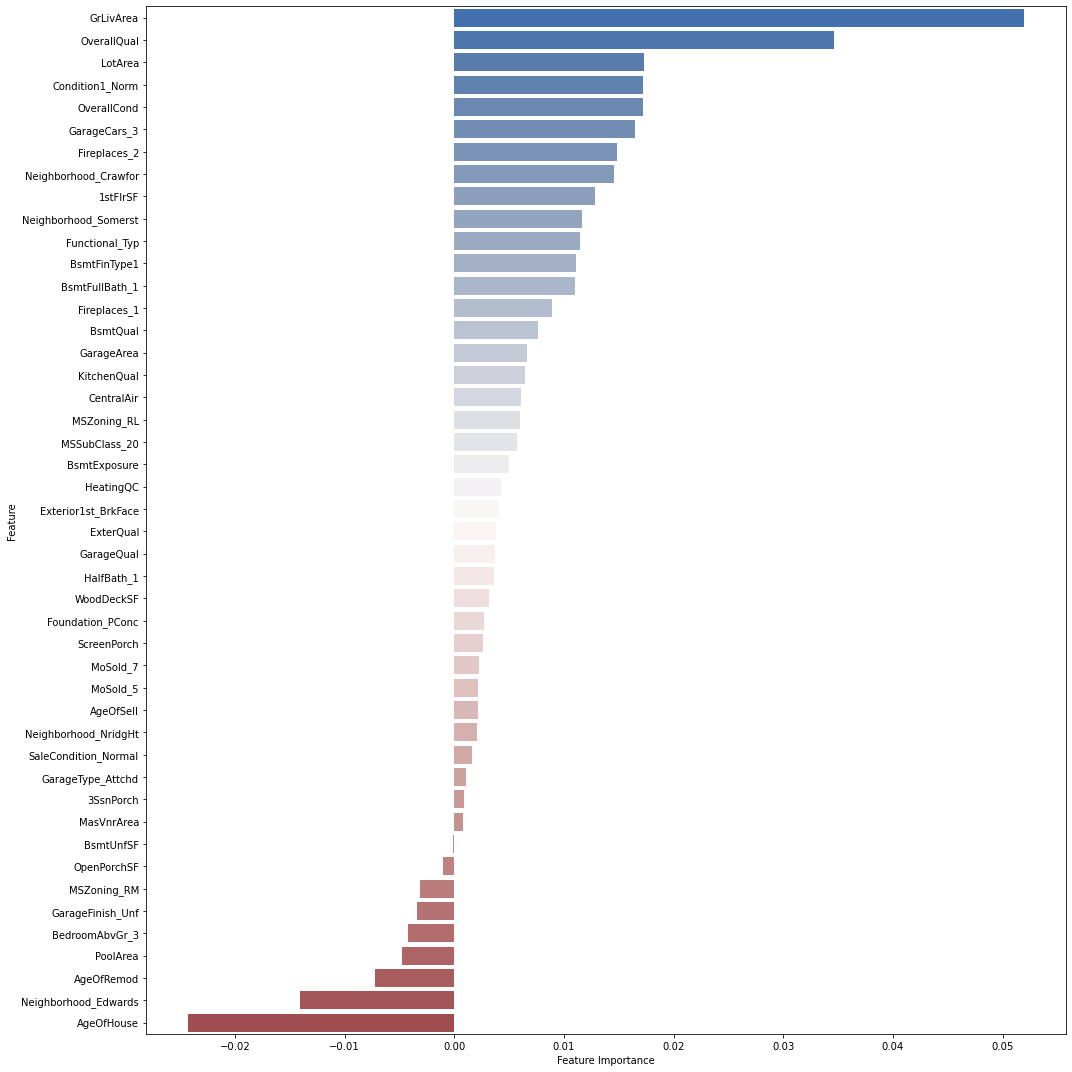

In [97]:

plt.figure(figsize=(15,15))
sns.barplot(x="Coefficients", y="Feature", data=Lasso_coef, palette="vlag")
plt.xlabel("Feature Importance")
plt.tight_layout()